## Tasca M5 T01
Descripció
Exercicis d'Hipotesis Testing

### Exercici 1  
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades.   
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [ ]:
De forma previa farè una anàlisis de les dades que estudiarem en aquests exercicis.

In [2]:
import numpy as np
import pandas as pd

fitxer="D:/Users/X/Downloads/Lligues europees UEFA.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=';',index_col='Rk') #encoding='ISO-8859-1' tambe ok
df

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster


In [16]:
df.shape
#El fitxer te 98 files i 20 atributs (més l'index)

(98, 20)

El fitxer conté informació de les lligues de futbol de 5 països europeus relativa la classificació, partits jugats i gols marcats i encaixats, així com de les seves probabilitats i expectatives. També hi ha informacio sobre l'assistència d'espectadors als estadis i s'indiquen els resultats dels últims 5 partits, els noms del jugados que han marcat més gols i del porter de cada equip.

'Significat de les columnes'  

Rk: Ranking (Índex).  
Squad: Equip.  
Country: Pais.  
LgRk: Posició de l'equip a la lliga del seu pais.  
MP: Partits jugats.  
W: Partits guanyats.  
D: Partidos empatats.  
L: Partidos perduts.  
GF: Gols a favor.  
GA: Gols en contra.  
GD: Diferència de gols (GF-GA).  
pts: Punts.  
pts/G: Punts/Partidos jugados(MP).  
xG: Probabilitat goles esperados, probabilidad de que un tiro produzca un gol.  
xGA: Probabilidad de gol esperado en contra, probabilidad que un tiro en contra produzca un gol.  
xGD: Diferencia entre goles esperados y goles esperados en contra.  
xGD/90:= Diferencia de probalidad en 90 minuts.  
Last 5: Resultat dels últims 5 partits (W=Guanyat, D=Empatat, l=Perdut).  
Attendance: Dades d'assitència als partits.  
Top Team Scorer: Màxim golejador  
Goalkeeper: Nom del porter  

In [3]:
df.info() #El fitxer no conté valors nuls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            98 non-null     object 
 1   Country          98 non-null     object 
 2   LgRk             98 non-null     int64  
 3   MP               98 non-null     int64  
 4   W                98 non-null     int64  
 5   D                98 non-null     int64  
 6   L                98 non-null     int64  
 7   GF               98 non-null     int64  
 8   GA               98 non-null     int64  
 9   GD               98 non-null     int64  
 10  Pts              98 non-null     int64  
 11  Pts/G            98 non-null     float64
 12  xG               98 non-null     float64
 13  xGA              98 non-null     float64
 14  xGD              98 non-null     float64
 15  xGD/90           98 non-null     float64
 16  Last 5           98 non-null     object 
 17  Attendance       9

In [17]:
#estadística descriptiva del model de dades
df.describe()

,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [4]:
df[df.duplicated()] #no hi han files duplicades

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,


In [5]:
df[df['Squad'].duplicated()] #No hi han equips duplicats

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,


In [6]:
df['Country'].duplicated().head(15) #Hi ha vàries files per cada pais

Rk
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
Name: Country, dtype: bool

In [7]:
df[df['Country'].duplicated()]

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
7,Inter,ITA,2,37,24,9,4,81,32,49,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
8,Napoli,ITA,3,37,23,7,7,71,31,40,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14,David Ospina
9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel
10,Barcelona,ESP,2,37,21,10,6,68,36,32,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster


In [8]:
print(df['Country'].values)
print(df['Country'].value_counts())
print(df['Country'].unique())

#tenim dades de 5 paisos

['ENG' 'ENG' 'ESP' 'GER' 'FRA' 'ITA' 'ITA' 'ITA' 'GER' 'ESP' 'ENG' 'ITA'
 'GER' 'FRA' 'ENG' 'FRA' 'ESP' 'ENG' 'ESP' 'FRA' 'ESP' 'ITA' 'GER' 'FRA'
 'FRA' 'GER' 'ESP' 'FRA' 'ITA' 'ITA' 'GER' 'ITA' 'FRA' 'ENG' 'GER' 'ESP'
 'ENG' 'ESP' 'FRA' 'FRA' 'ITA' 'ENG' 'ITA' 'GER' 'ITA' 'GER' 'ENG' 'GER'
 'ENG' 'FRA' 'ESP' 'ENG' 'ESP' 'FRA' 'GER' 'ENG' 'GER' 'GER' 'ENG' 'ESP'
 'ITA' 'ENG' 'FRA' 'ITA' 'ESP' 'GER' 'ESP' 'ENG' 'ESP' 'ESP' 'FRA' 'ITA'
 'FRA' 'ESP' 'ENG' 'ESP' 'GER' 'ITA' 'ESP' 'FRA' 'GER' 'FRA' 'ENG' 'ENG'
 'ITA' 'ESP' 'FRA' 'ESP' 'FRA' 'ITA' 'GER' 'ITA' 'ITA' 'FRA' 'ITA' 'ENG'
 'ENG' 'GER']
ENG    20
ESP    20
FRA    20
ITA    20
GER    18
Name: Country, dtype: int64
['ENG' 'ESP' 'GER' 'FRA' 'ITA']


<Axes: xlabel='Pts', ylabel='Count'>

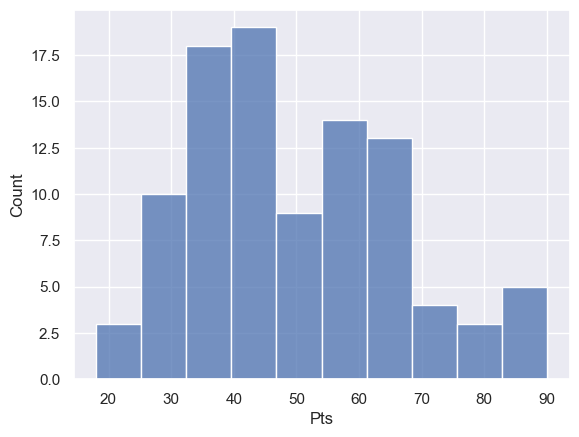

In [2]:
#Analitzem la variable 'Pts'
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

fitxer="D:/Users/X/Downloads/Lligues europees UEFA.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=';',index_col='Rk') #encoding='ISO-8859-1' tambe ok
sns.set_theme()
x=df['Pts']
sns.histplot(x,bins=10)

#Per l'histograma no sembla que la distribució no sigui normal,
#per ratifiquem-ho amb un test de normalitat

In [3]:
#Comprovem si te una distribució normal amb el test de Shapiro-Wilk
#Test de normalitat a la variable 'Pts'
# Example of the Shapiro-Wilk Normality Test

# Alfa=5%
# H0: La mostra té una distribució normal
# H1: La mostra no té una distribució normal

from scipy.stats import shapiro

stat, p = shapiro(x)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
else:
    print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')


stat=0.972, p=0.035
p<=Alfa: Rebutjem H0: Probablement la distribució no és normal


----ENG-----
Pts: [90, 86, 70, 68, 66, 58, 56, 51, 48, 48, 45, 46, 44, 43, 40, 36, 35, 34, 23, 22]
stat=0.950, p=0.374
p>Alfa: No podem rebutjar H0: Probablement la distribució és normal
----ESP-----
Pts: [85, 73, 68, 67, 64, 62, 56, 55, 47, 46, 45, 42, 41, 39, 39, 37, 36, 36, 32, 31]
stat=0.919, p=0.096
p>Alfa: No podem rebutjar H0: Probablement la distribució és normal
----GER-----
Pts: [77, 69, 64, 58, 57, 55, 52, 46, 46, 45, 42, 42, 42, 38, 33, 33, 28, 18]
stat=0.988, p=0.995
p>Alfa: No podem rebutjar H0: Probablement la distribució és normal
----FRA-----
Pts: [83, 68, 68, 65, 63, 63, 61, 58, 54, 54, 48, 46, 43, 38, 37, 36, 35, 31, 31, 28]
stat=0.949, p=0.352
p>Alfa: No podem rebutjar H0: Probablement la distribució és normal
----ITA-----
Pts: [83, 81, 76, 69, 62, 59, 60, 59, 52, 50, 50, 44, 43, 38, 36, 33, 31, 29, 28, 26]
stat=0.944, p=0.280
p>Alfa: No podem rebutjar H0: Probablement la distribució és normal


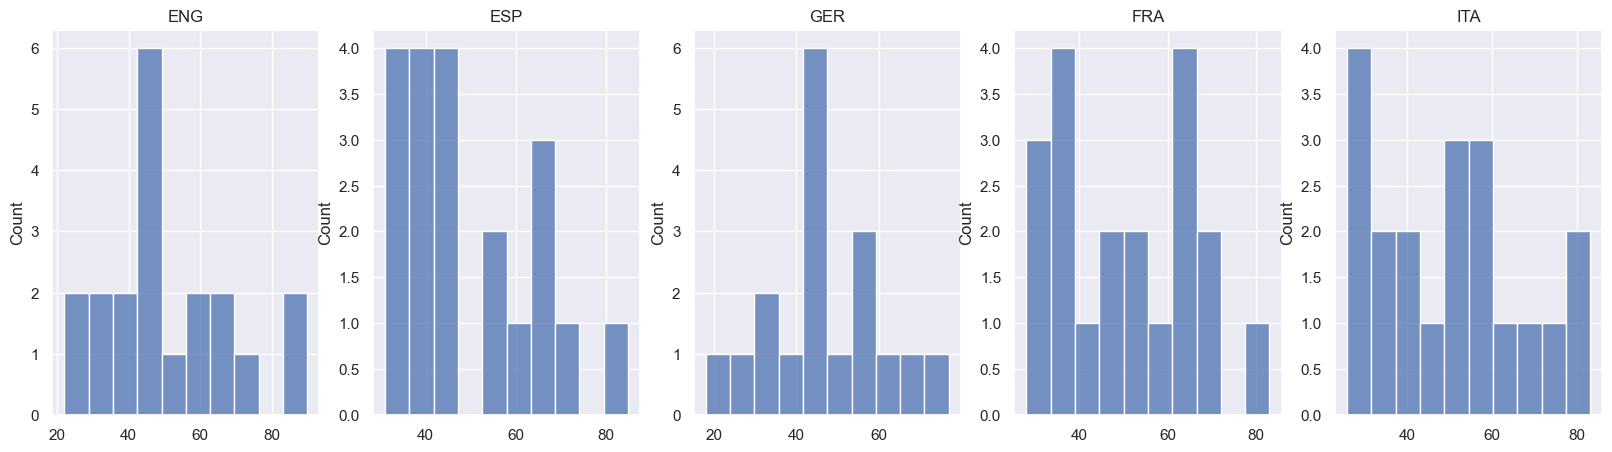

In [4]:
# Fem un test de normalitat de la variable Pts a cadascun dels paisos

# Alfa=5%
# H0: La mostra té una distribució normal
# H1: La mostra no té una distribució normal

from scipy.stats import shapiro

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fitxer="D:/Users/X/Downloads/Lligues europees UEFA.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=';',index_col='Rk') #encoding='ISO-8859-1' tambe ok

llista_paisos=df['Country'].unique()
#llista_paisos
fig, axes = plt.subplots(1, llista_paisos.size, figsize=(20, 5))
i=0
for pais in llista_paisos:
    print('----' + pais +'-----')
    #df_pais=df[df['Country'==pais]]
    df_pais=df[df['Country']==pais]
    #print(df_pais)
    x=df_pais['Pts'].tolist()
    print('Pts:',x)
    #dibuixem histplot
    sns.histplot(ax=axes[i],data=x,bins=10)
    axes[i].set_title(pais)
    i=i+1
    stat, p = shapiro(x)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('p>Alfa: No podem rebutjar H0: Probablement la distribució és normal')
    else:
        print('p<=Alfa: Rebutjem H0: Probablement la distribució no és normal')
        
#En aquest cas si que veiem que la variable 'Pts' per cadascun dels països si que te una distribució normal 

### Exercici 2  
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades.  
Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.



In [13]:
 # Analitzem la matriu de correlacio de les dades

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

fitxer="D:/Users/X/Downloads/Lligues europees UEFA.csv"
df=pd.read_csv(fitxer,encoding='Latin1',sep=';',index_col='Rk') #encoding='ISO-8859-1' tambe ok

df.corr()

#Sembla que les  variable 'GD' (diferència entre gols marcats i gols encaixats) i 'Pts' (punts) poden estar relacionades
print('Coeficient de correlació entre GD i Pts:',df['GD'].corr(df['Pts']))


Coeficient de correlación entre GD i Pts: 0.9604021653147555


----ENG-----
x (punts): [90, 86, 70, 68, 66, 58, 56, 51, 48, 48, 45, 46, 44, 43, 40, 36, 35, 34, 23, 22]
y (diferencia de gols): [72, 65, 42, 24, 11, 1, 11, -3, 0, -4, 4, -7, -1, -21, -20, -20, -38, -18, -42, -56]
stat=0.968, p=0.000
p<=Alfa: Rebutjem H0: Probablement les dues variables son dependents
----ESP-----
x (punts): [85, 73, 68, 67, 64, 62, 56, 55, 47, 46, 45, 42, 41, 39, 39, 37, 36, 36, 32, 31]
y (diferencia de gols): [49, 32, 21, 22, 22, 4, 24, 8, -12, 2, -7, -9, -13, -6, -14, -17, -17, -29, -27, -33]
stat=0.957, p=0.000
p<=Alfa: Rebutjem H0: Probablement les dues variables son dependents
----GER-----
x (punts): [77, 69, 64, 58, 57, 55, 52, 46, 46, 45, 42, 42, 42, 38, 33, 33, 28, 18]
y (diferencia de gols): [60, 33, 33, 35, 6, 12, 3, 5, -2, -7, -4, -11, -14, -17, -18, -34, -26, -54]
stat=0.968, p=0.000
p<=Alfa: Rebutjem H0: Probablement les dues variables son dependents
----FRA-----
x (punts): [83, 68, 68, 65, 63, 63, 61, 58, 54, 54, 48, 46, 43, 38, 37, 36, 35, 31, 31, 28]
y

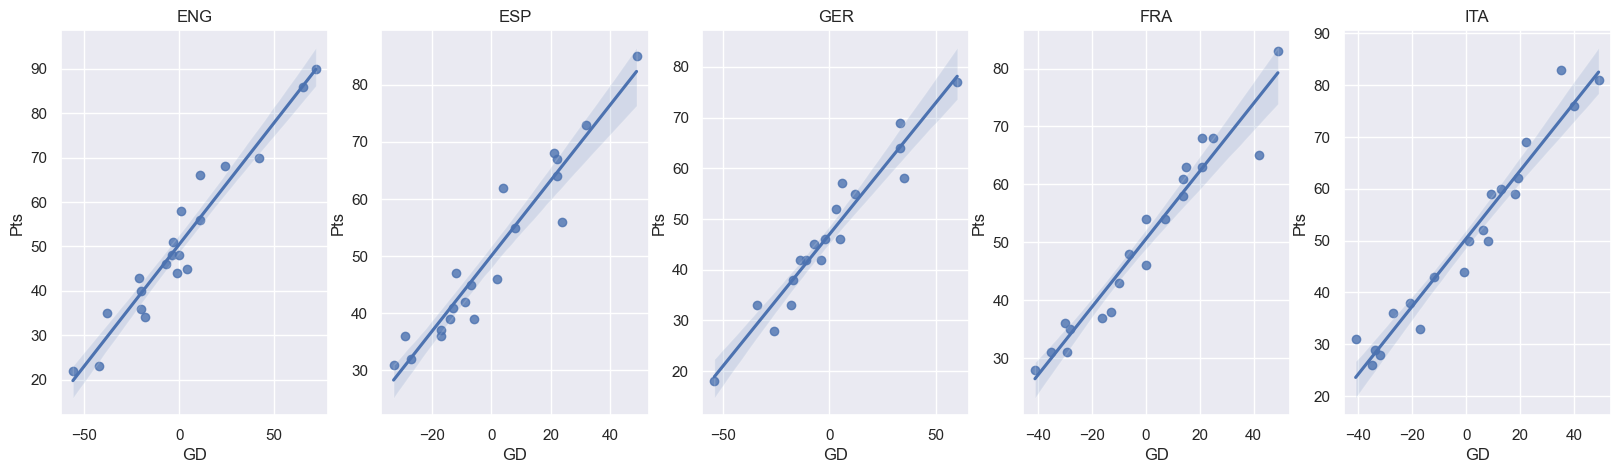

In [14]:
#Veiem la relació entre les variables GD i Pts en cadascuna de les lligues nacionals de les que tenim dades
#Mirarem si aquestes dues variables són dependents amb el test de Pearson

# Alfa=5%
# H0: Les dues mostres son independents
# H1: Hi ha dependencia entre les dues variables

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

fitxer="D:/Users/X/Downloads/Lligues europees UEFA.csv"
df=pd.read_csv(fitxer,encoding='Latin1',sep=';',index_col='Rk') #encoding='ISO-8859-1' tambe ok


llista_paisos=df['Country'].unique()
#llista_paisos
fig, axes = plt.subplots(1, llista_paisos.size, figsize=(20, 5))
i=0
for pais in llista_paisos:
    print('----' + pais +'-----')
    df_pais=df[df['Country']==pais]
    #dibuixem regplot
    sns.regplot(ax=axes[i],data=df_pais, x="GD", y="Pts")
    axes[i].set_title(pais)
    i=i+1
    #print(df_pais.corr())
    #print(df_pais)
    x=df_pais['Pts'].tolist()
    print('x (punts):',x)
    y=df_pais['GD'].tolist()
    print('y (diferencia de gols):',y)
    stat, p = pearsonr(x ,y)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('p>Alfa: No podem rebutjar H0: Probablement les variables son independents')
    else:
        print('p<=Alfa: Rebutjem H0: Probablement les dues variables son dependents')

Veiem ara si la distribució de punts de les lligues de dos països (Anglaterra i Espanya) tenen la mateixa distribució.  
Per fer-ho, emprarem el test d'Student

x (Pts ENG): [90, 86, 70, 68, 66, 58, 56, 51, 48, 48, 45, 46, 44, 43, 40, 36, 35, 34, 23, 22]
Varianza ENG 319.8475
y (Pts ESP): [85, 73, 68, 67, 64, 62, 56, 55, 47, 46, 45, 42, 41, 39, 39, 37, 36, 36, 32, 31]
Varianza ESP 222.54749999999999
stat=0.075, p=0.941
p>Alfa: No podem rebutjar H0: Probablement les variables tenen la mateixa distribució


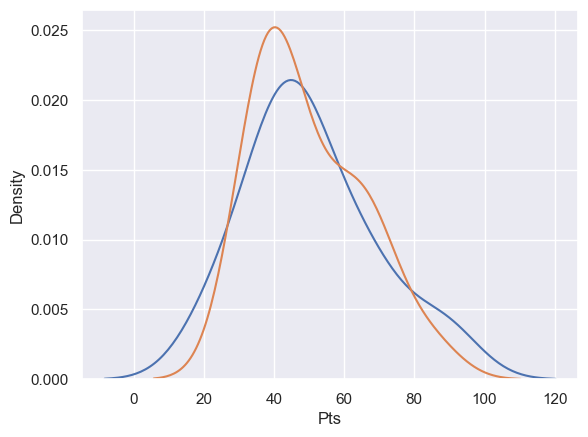

In [20]:
# Alfa=5%
# H0: Les mitjanes de les mostres son iguals
# H1: Les mitjanes de les mostres no són iguals


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

sns.set_theme()

fitxer="D:/Users/X/Downloads/Lligues europees UEFA.csv"
df=pd.read_csv(fitxer,encoding='Latin1',sep=';',index_col='Rk') #encoding='ISO-8859-1' tambe ok

#dibuixem histplot
sns.kdeplot(x=df[df['Country']=='ENG']['Pts'])
sns.kdeplot(x=df[df['Country']=='ESP']['Pts'])
x=df[df['Country']=='ENG']['Pts'].tolist()
print('x (Pts ENG):',x)
print('Varianza ENG',np.var(x))
y=df[df['Country']=='ESP']['Pts'].tolist()
print('y (Pts ESP):',y)
print('Varianza ESP',np.var(y))
stat, p = ttest_ind(x, y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement les variables tenen la mateixa distribució')
else:
    print('p<=Alfa: Rebutjem H0: Probablement les dues variables no tenen la mateix distribució')

# La variable punts, a Anglaterra i Espanya, tenen la mateixa mitjana

### Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades.  
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Veiem si les distribucions de les mitjanes de les variables GF (gols a favor), GA (gols en contra) i GD (diferència de gols) poden considerar-se significament iguals o diferents.    
Per determinar-ho, farem un anàlisis de variança mitjançant un test Anova.   

stat=31.450, p=0.000
p<=Alfa: Rebutjem H0: Probablement les dues variables no tenen la mateix distribució


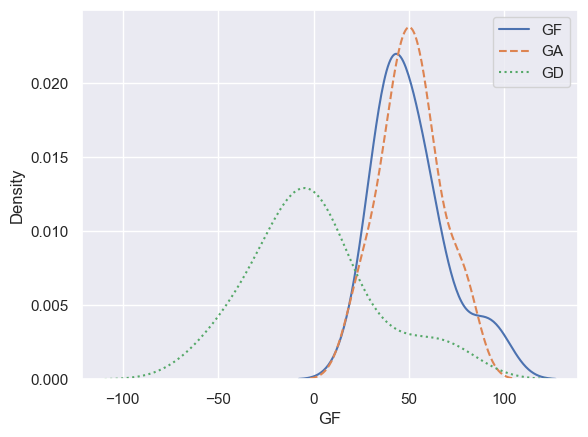

In [28]:
# Alfa=5%
# H0: Les mitjanes de les mostres son iguals
# H1: Les mitjanes de les mostres no són iguals

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

sns.set_theme()


fitxer="D:/Users/X/Downloads/Lligues europees UEFA.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=';',index_col='Rk') #encoding='ISO-8859-1' tambe ok

#x=df['GF']
#y=df['GA']
#z=df['GD']
x=df[df['Country']=='ENG']['GF']
y=df[df['Country']=='ENG']['GA']
z=df[df['Country']=='ENG']['GD']
sns.kdeplot(x=x,label='GF',linestyle='solid')
sns.kdeplot(x=y,label='GA',linestyle='dashed')
sns.kdeplot(x=z,label='GD',linestyle='dotted')
plt.legend()

stat, p = f_oneway(x,y,z)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement les variables tenen la mateixa distribució')
else:
    print('p<=Alfa: Rebutjem H0: Probablement les dues variables no tenen la mateix distribució')

# Les variables GF, GA i GD no tenen la mateixa mitjana

Veiem la variable 'Pts' (punts) en les 5 lligues europees si tenen la mateixa mitjana

stat=0.161, p=0.958
p>Alfa: No podem rebutjar H0: Probablement les variables tenen la mateixa distribució


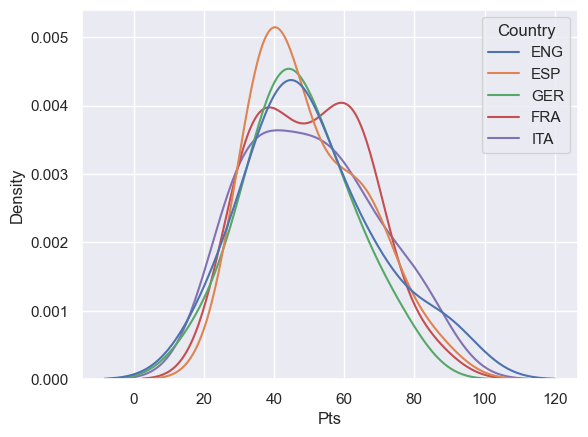

In [30]:
# Alfa=5%
# H0: Les mitjanes de les mostres son iguals
# H1: Les mitjanes de les mostres no són iguals

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

sns.set_theme()


fitxer="D:/Users/X/Downloads/Lligues europees UEFA.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=';',index_col='Rk') #encoding='ISO-8859-1' tambe ok

sns.kdeplot(x=df['Pts'],hue=df['Country'])

data1=df[df['Country']=='ENG']['Pts']
data2=df[df['Country']=='ESP']['Pts']
data3=df[df['Country']=='ITA']['Pts']
data4=df[df['Country']=='GER']['Pts']
data5=df[df['Country']=='FRA']['Pts']
stat, p = f_oneway(data1, data2, data3,data4,data5)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('p>Alfa: No podem rebutjar H0: Probablement les variables tenen la mateixa distribució')
else:
    print('p<=Alfa: Rebutjem H0: Probablement les dues variables no tenen la mateix distribució')

# La variable GF a les 5 lligues te la mateixa mitjana